In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import prince
import importlib

import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.cm as cm
import matplotlib.patches as mpatches

from networkx.algorithms import bipartite


import community as community_louvain
from netgraph import Graph

import sys
sys.path.insert(0, '../Utility files')
import corg
from corg import DiscoverDimension
import seaborn as sn
from corg import BenchmarkDimension
from corg import DiscoverDimension


import utils2
from utils2 import *
import graphfunk
from graphfunk import *

import ca_pipeline
from ca_pipeline import PipelineCorAnalysis





/tmp/ipykernel_1328781/147310087.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# load data
path = '/home/livtollanes/NewData/french/french_edgelist_marker_threshold.csv'

req_cols = ['marker_id', 'follower_id', 'twitter_name','followers','french_followers', 'type', 'type2']
dtypes = {'marker_id': 'object',
          'follower_id': 'object',
          'twitter_name': 'object',
          'followers': 'int64',
          'french_followers': 'int64',
          'type': 'object',
          'type2': 'object'}


all = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

In [3]:
# load the labeled marker edgelist (labeled markers and their followers)
path = '/home/livtollanes/NewData/french/labeled_edgelist_hl.csv'

req_cols = ['marker_id', 'follower_id', 'twitter_name','followers','french_followers', 'type', 'type2', 'label']
dtypes = {'marker_id': 'object',
          'follower_id': 'object',
          'twitter_name': 'object',
          'followers': 'int64',
          'french_followers': 'int64',
          'type': 'object',
          'type2': 'object',
          'label': 'object'}


labeled_marker_edgelist = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

In [6]:
# create models for different subsets of the data 
m2_df = all[all['type'] != 'party']
m3_df = all[~all['type'].isin(['media', 'party', 'universities'])]
m4_df = all[~all['type'].isin(['media', 'party', 'universities','clubs de football'])]
m5_df = all[~all['type'].isin(['media', 'party', 'universities','clubs de football', 'luxe vetements et malls'])]

selected_twitter_names = ['Dior', 'CHANEL', 'LouisVuitton', 'YSL', 'Cartier', 'Hermes_Paris', 'VeuveClicquot']
m6_df = m4_df[~((m4_df['type'] == 'luxe vetements et malls') & (m4_df['twitter_name'].isin(selected_twitter_names)))]


m7_df = all[all['type'].isin(['chain restaurants', 'commerce', 'grande distribution', 'luxe vetements et malls', 'sport'])]
m8_df = all[all['type'].isin(['media', 'magazine'])]
m9_df = all[all['type'].isin(['universities', 'ecoles de commerce', 'Lycées professionels'])]



In [34]:
m2_df.head()

,marker_id,follower_id,twitter_name,type,followers,french_followers,type2
0,19976004,1193293102162862080,Mediapart,media,3079643,64182,information
1,19976004,2884619299,Mediapart,media,3079643,64182,information
2,19976004,782999494703054848,Mediapart,media,3079643,64182,information
3,19976004,124458686,Mediapart,media,3079643,64182,information
4,19976004,2960220189,Mediapart,media,3079643,64182,information


Starting graph checks...
Number of nodes: 115302
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 115302
Number of communities: 4
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


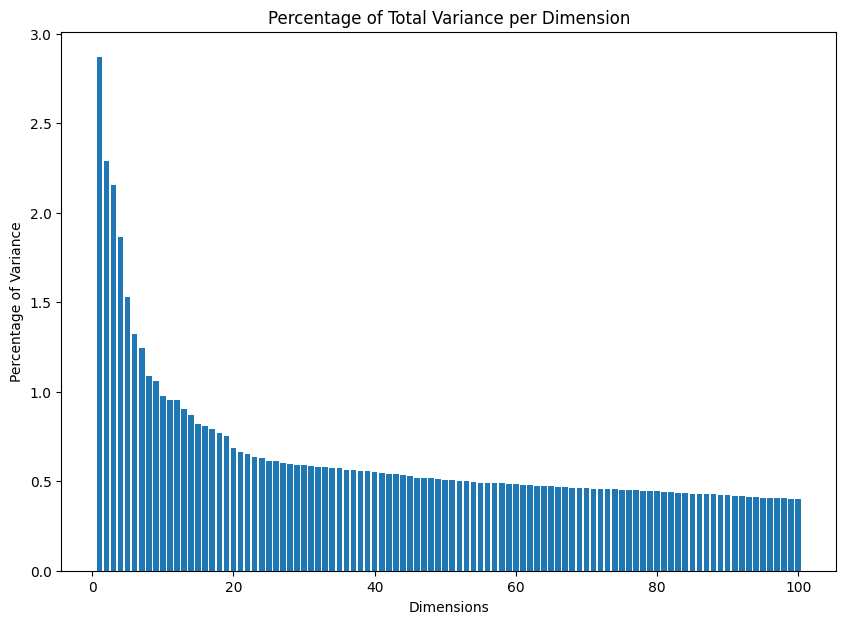

CA pipeline complete.


In [18]:
import importlib
importlib.reload(ca_pipeline)
# Create an instance of the class

subset_name = 'm1'
m1 = ca_pipeline.PipelineCorAnalysis(all, subset_name)
path_m1 = '/home/livtollanes/NewData/coordinates'
m1.run_all(path_m1)

Starting graph checks...
Number of nodes: 115245
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 115245
Number of communities: 4
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


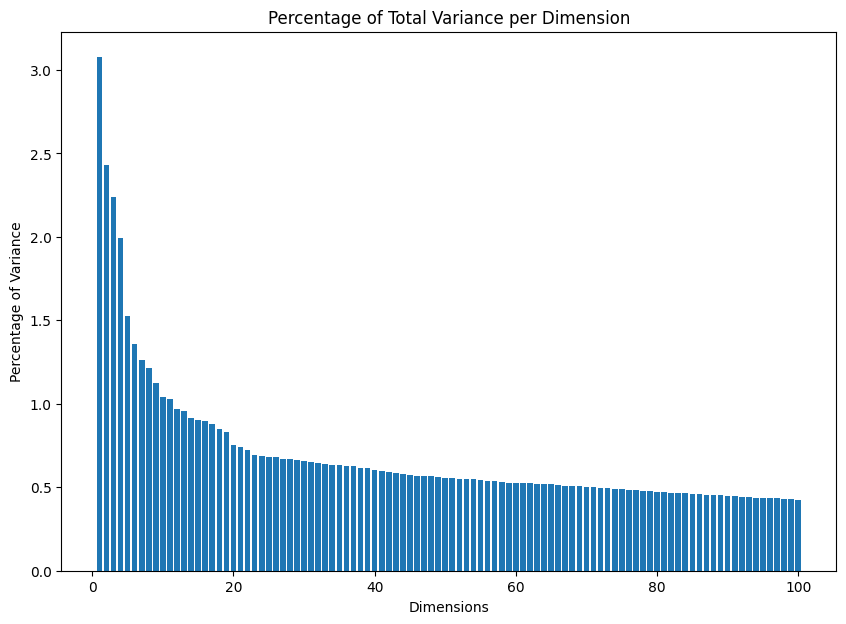

CA pipeline complete.


In [19]:
# Create an instance of the class
subset_name = 'm2'
m2 = ca_pipeline.PipelineCorAnalysis(m2_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m2.run_all(path)

Starting graph checks...
Number of nodes: 105711
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 105711
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


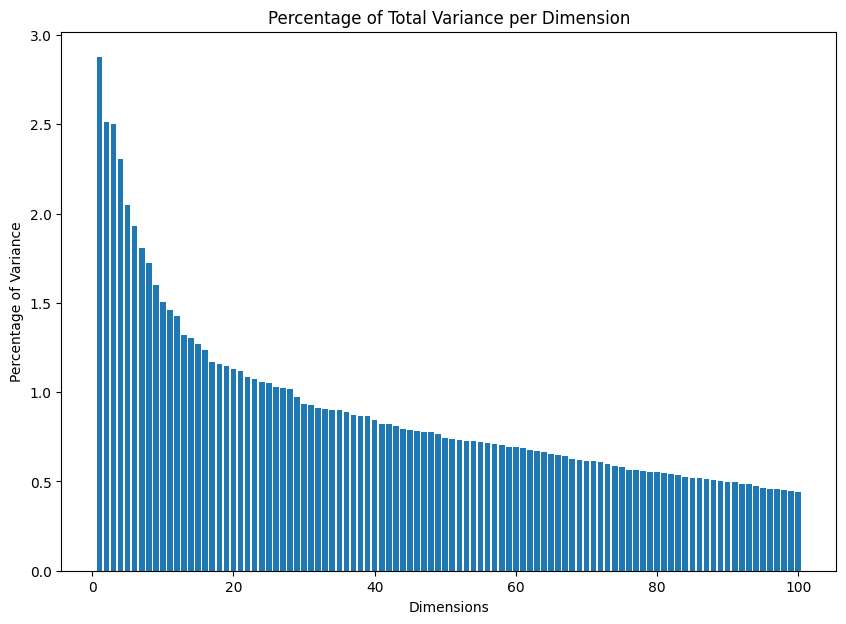

CA pipeline complete.


In [20]:
subset_name = 'm3'
m3 = ca_pipeline.PipelineCorAnalysis(m3_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m3.run_all(path)

Starting graph checks...
Number of nodes: 101996
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 101996
Number of communities: 4
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


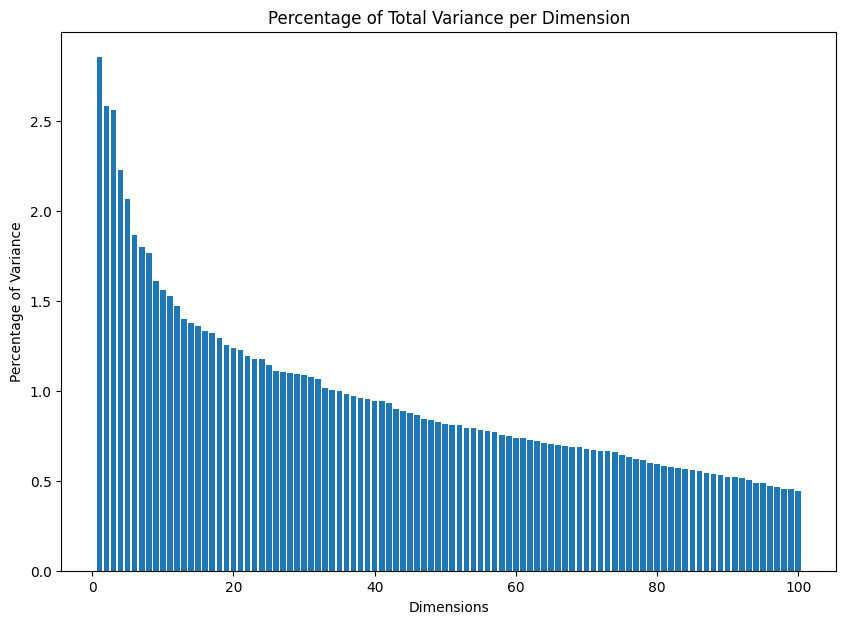

CA pipeline complete.


In [21]:
subset_name = 'm4'
m4 = ca_pipeline.PipelineCorAnalysis(m4_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m4.run_all(path)

Starting graph checks...


Number of nodes: 100748
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 100748
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


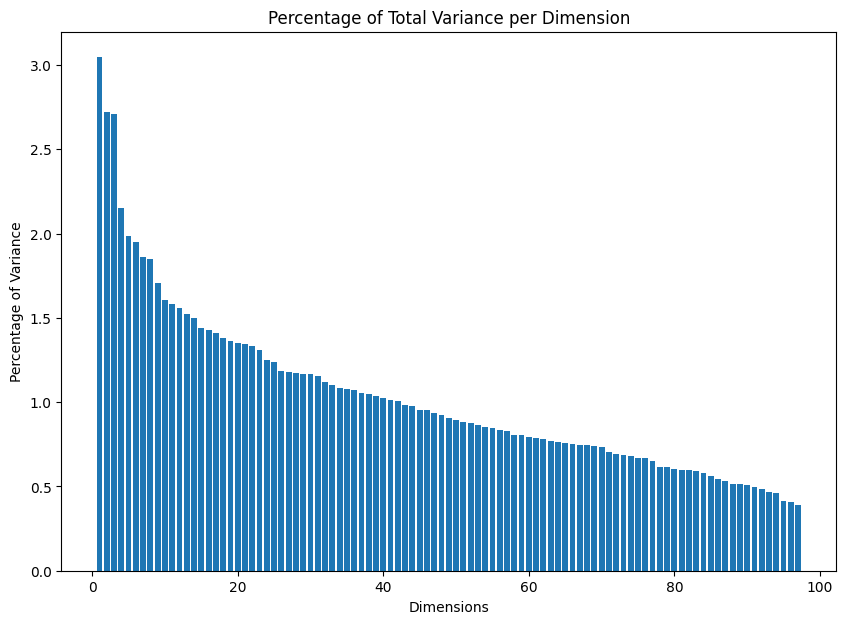

CA pipeline complete.


In [22]:
subset_name = 'm5'
m5 = ca_pipeline.PipelineCorAnalysis(m5_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m5.run_all(path)

Starting graph checks...
Number of nodes: 100973
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 100973
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


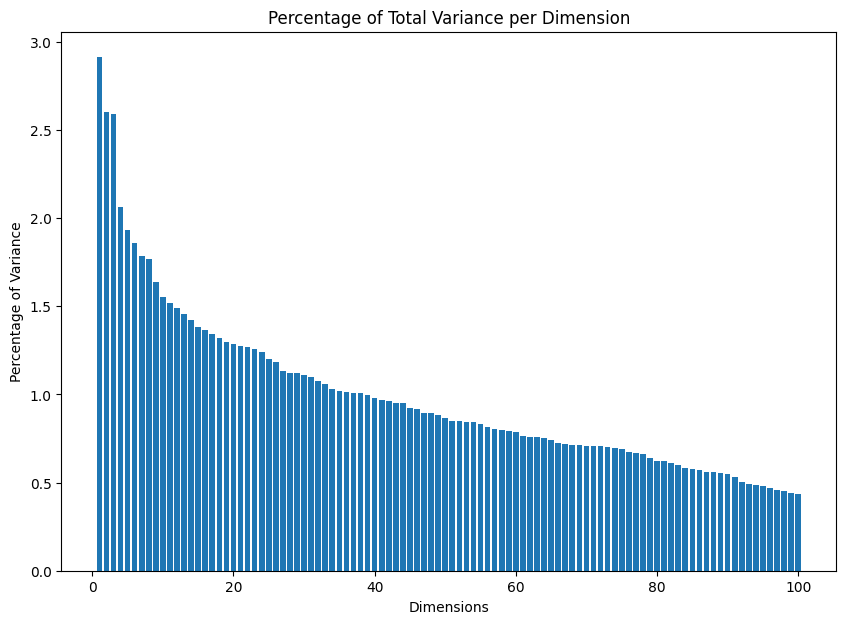

CA pipeline complete.


In [7]:
subset_name = 'm6'
m6 = ca_pipeline.PipelineCorAnalysis(m6_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m6.run_all(path)

Starting graph checks...
Number of nodes: 51383
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 51383
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


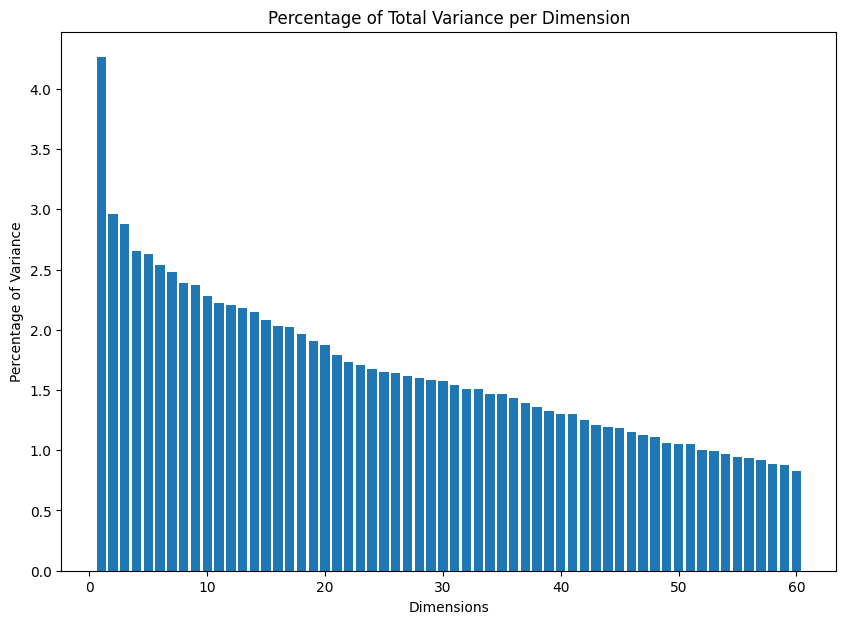

CA pipeline complete.


In [23]:
subset_name = 'm7'
m7 = ca_pipeline.PipelineCorAnalysis(m7_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m7.run_all(path)

Starting graph checks...
Number of nodes: 108905
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 108905
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


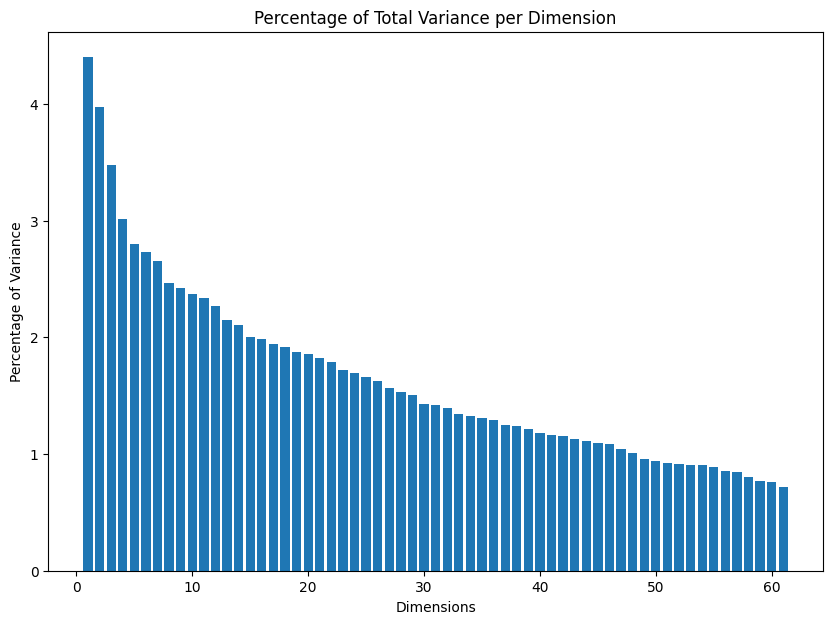

CA pipeline complete.


In [24]:
subset_name = 'm8'
m8 = ca_pipeline.PipelineCorAnalysis(m8_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m8.run_all(path)

Starting graph checks...
Number of nodes: 36633
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 36633
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


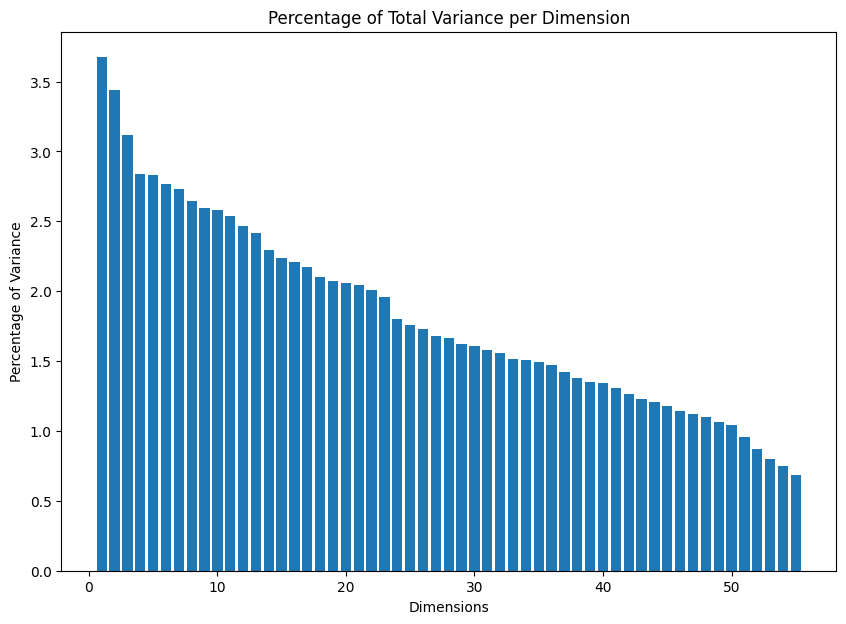

CA pipeline complete.


In [26]:
importlib.reload(ca_pipeline)
subset_name = 'm9'
m9 = ca_pipeline.PipelineCorAnalysis(m9_df, subset_name)
path = '/home/livtollanes/NewData/coordinates'
m9.run_all(path)



Do we need to update the filters everytime? So when removing certain markers, removing users also? Cause the old threshold marks migfht no longe rhold


### Fit the pipeline for the labeled data - CORG input

Starting graph checks...
Number of nodes: 65781
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 65781
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


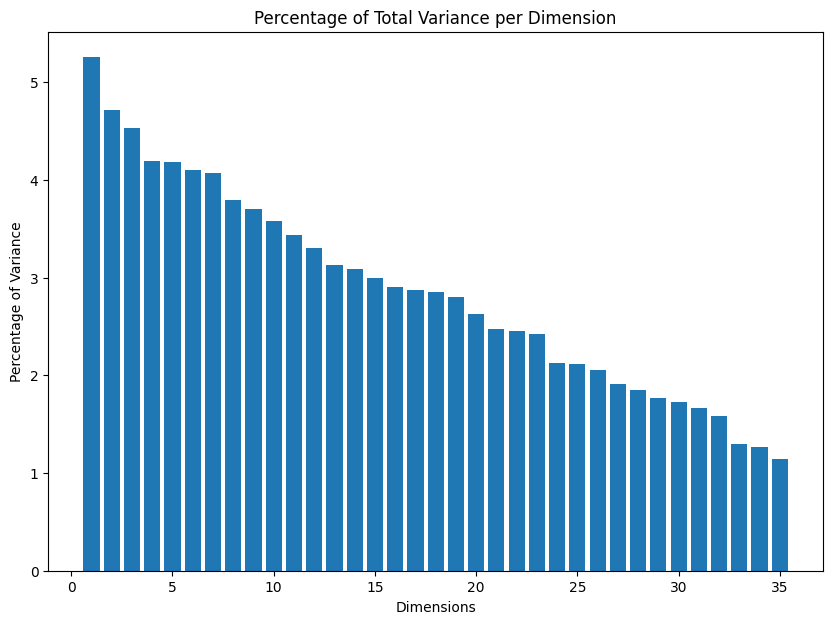

CA pipeline complete.


In [8]:
importlib.reload(ca_pipeline)
subset_name = 'labeled_markers'
labeled = ca_pipeline.PipelineCorAnalysis(labeled_marker_edgelist, subset_name)
path = '/home/livtollanes/NewData/coordinates'
labeled.run_all(path)

In [9]:
labeled_marker_edgelist.columns

Index(['marker_id', 'follower_id', 'twitter_name', 'type', 'followers',
       'french_followers', 'type2', 'label'],
      dtype='object')